In [3]:
import os
import cv2
import matplotlib.pyplot as plt
from random import randint
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [4]:
class callbacka(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>=0.90):
            print("\nLoss is low stopping trainng")
            self.model.stop_training=True

In [5]:
mcallbacks=callbacka()

In [6]:
base_dir='F:\chest_xray'
local_weight_file='resnet50_notop.h5'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
sample_image_pneumonia=os.listdir(os.path.join(train_dir,'PNEUMONIA'))
sample_image_healthy=os.listdir(os.path.join(train_dir,'NORMAL'))

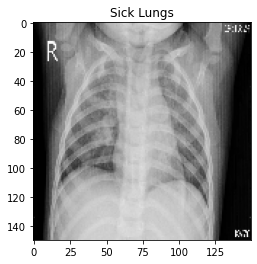

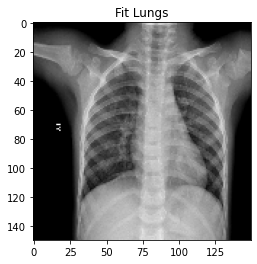

In [7]:
sample_image_pnue=sample_image_pneumonia[randint(0,(len(sample_image_pneumonia)-1))]
sample_image_normal=sample_image_healthy[randint(0,(len(sample_image_healthy)-1))]

img_to_array_sick=cv2.imread(os.path.join(os.path.join(train_dir,'PNEUMONIA'),sample_image_pnue))
img_to_array_fit=cv2.imread(os.path.join(os.path.join(train_dir,'NORMAL'),sample_image_normal))

plt.imshow(cv2.resize(img_to_array_sick,(150,150)))
plt.title("Sick Lungs")
plt.show()

plt.imshow(cv2.resize(img_to_array_fit,(150,150)))
plt.title("Fit Lungs")
plt.show()

In [9]:
pre_trained_model=ResNet50(input_shape=(100,100,3),include_top=False,weights="imagenet")

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

94773248/94765736 [==============================] - 12s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
_________________________

In [10]:
last_layer=pre_trained_model
last_output=last_layer.output
x=layers.Flatten()(last_output)
x=layers.Dense(512,activation='relu')(x)
x=layers.Dropout(0.3)(x)
x=layers.Dense(1,activation='sigmoid')(x)

model=Model(pre_trained_model.input,x)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   samplewise_center=True,samplewise_std_normalization=True)
test_datagen = ImageDataGenerator(rescale = 1./255,samplewise_center=True,samplewise_std_normalization=True)
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(100,100))

Found 2682 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


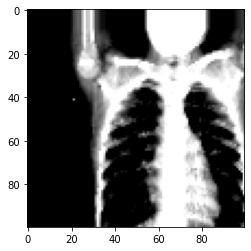

In [12]:
batch=train_generator.next()
data_sample=batch[0]
train_datagen.fit(data_sample)
x,y=train_generator.__getitem__(1)
plt.imshow(x[1])

In [13]:
validation_generator=test_datagen.flow_from_directory(test_dir,batch_size=10,class_mode='binary',target_size=(100,100))

Found 624 images belonging to 2 classes.


In [14]:
history=model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=134,epochs=20,validation_steps=60,verbose=2)

Epoch 1/20
134/134 - 187s - loss: 1.1745 - accuracy: 0.7521 - val_loss: 0.4857 - val_accuracy: 0.7967
Epoch 2/20
134/134 - 152s - loss: 0.3872 - accuracy: 0.8276 - val_loss: 0.4908 - val_accuracy: 0.8100
Epoch 3/20
134/134 - 156s - loss: 0.3643 - accuracy: 0.8497 - val_loss: 0.4922 - val_accuracy: 0.8117
Epoch 4/20
134/134 - 157s - loss: 0.3492 - accuracy: 0.8497 - val_loss: 0.4938 - val_accuracy: 0.8083
Epoch 5/20
134/134 - 155s - loss: 0.3231 - accuracy: 0.8681 - val_loss: 0.4536 - val_accuracy: 0.8367
Epoch 6/20
134/134 - 159s - loss: 0.3371 - accuracy: 0.8561 - val_loss: 0.4279 - val_accuracy: 0.8333
Epoch 7/20
134/134 - 157s - loss: 0.3294 - accuracy: 0.8753 - val_loss: 0.4017 - val_accuracy: 0.8417
Epoch 8/20
134/134 - 159s - loss: 0.3046 - accuracy: 0.8805 - val_loss: 0.3880 - val_accuracy: 0.8400
Epoch 9/20
134/134 - 159s - loss: 0.3034 - accuracy: 0.8693 - val_loss: 0.4159 - val_accuracy: 0.8483
Epoch 10/20
134/134 - 157s - loss: 0.3056 - accuracy: 0.8809 - val_loss: 0.4442 - 

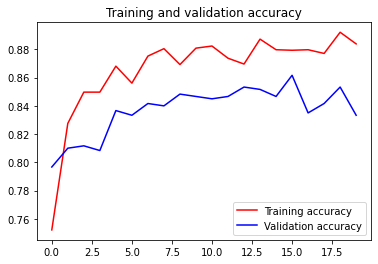

<Figure size 432x288 with 0 Axes>

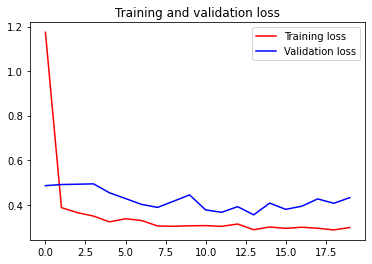

<Figure size 432x288 with 0 Axes>

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.plot(epochs,loss, 'r', label="Training loss")
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()